## 逻辑回归

如果还没有安装机器学习包sklearn，需要先使用conda命令安装机器学习包：sklearn，安装命令：
1）第一步，先在conda中进入当前notebook中的环境
2）第2步，安装该包：conda install scikit-learn

## 建立数据集

In [2]:
from collections import OrderedDict
import pandas as pd

In [251]:
#数据集
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,
            2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '通过考试':[0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]
}
examOrderDict=OrderedDict(examDict)
examDf=pd.DataFrame(examOrderDict)

In [252]:
examDf.head()

,学习时间,通过考试
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


## 提取特征和标签

In [253]:
#特征features
exam_X=examDf.loc[:,'学习时间']
#标签labes
exam_y=examDf.loc[:,'通过考试']

## 绘制散点图

通过散点图看看两个变量的分布情况。这里图形绘制代码看不懂也没关系，后面会在《数据可视化》课程中详细聊

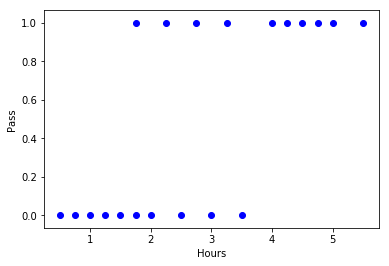

In [254]:
import matplotlib.pyplot as plt

#散点图
plt.scatter(exam_X, exam_y, color="b", label="exam data")

#添加图标标签
plt.xlabel("Hours")
plt.ylabel("Pass")
#显示图像
plt.show()

## .建立训练数据集和测试数据集

In [255]:
'''
train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取训练数据（train）和测试数据（test）
第一个参数：所要划分的样本特征
第2个参数：所要划分的样本标签
train_size：训练数据占比，如果是整数的话就是样本的数量
'''

from sklearn.cross_validation import train_test_split

#建立训练数据和测试数据
X_train , X_test , y_train , y_test = train_test_split(exam_X ,
                                                       exam_y ,
                                                       train_size = .8)
#输出数据大小
print('原始数据特征：',exam_X.shape ,
      '，训练数据特征：', X_train.shape , 
      '，测试数据特征：',X_test.shape )

print('原始数据标签：',exam_y.shape ,
      '训练数据标签：', y_train.shape ,
      '测试数据标签：' ,y_test.shape)

原始数据特征： (20,) ，训练数据特征： (16,) ，测试数据特征： (4,)
原始数据标签： (20,) 训练数据标签： (16,) 测试数据标签： (4,)


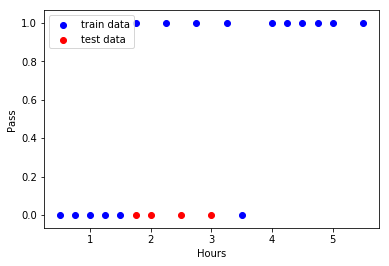

In [256]:
#绘制散点图
import matplotlib.pyplot as plt

#散点图
plt.scatter(X_train, y_train, color="blue", label="train data")
plt.scatter(X_test, y_test, color="red", label="test data")

#添加图标标签
plt.legend(loc=2)
plt.xlabel("Hours")
plt.ylabel("Pass")
#显示图像
plt.show()

## 训练模型（使用训练数据）

In [257]:
'''
运行后会报错，因为这里输入的特征只有1个。注意看报错信息，通过这个例子也学会如何分析报错信息
'''
#第1步：导入逻辑回归
from sklearn.linear_model import LogisticRegression
# 第2步：创建模型：逻辑回归
model = LogisticRegression()
#第3步：训练模型
model.fit(X_train , y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.5   4.    0.75  1.    5.    0.5   4.75  1.75  2.25  2.75  4.25  5.5
  3.25  4.5   3.5   1.25].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [180]:
'''
上面的报错内容，最后一行是这样提示我们的：
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
上面报错的内容翻译过来就是：
如果你输入的数据只有1个特征，需要用array.reshape(-1, 1)来改变数组的形状
shape是形状的意思，有首歌叫《shape of you》里面指的是女孩的身材令人难以忘记。在数据里就是指数据的大小。
numpy的reshape就是指改变数组的形状，下面通过几个案例你就明白了
'''

In [188]:
import numpy as np
#定义2行*3列的数组
aArr = np.array([
    [1, 2, 3],
    [5, 6, 7]
])
aArr.shape

(2, 3)

In [191]:
#改变数组形成为3行*2列
bArr=aArr.reshape(3,2)
bArr.shape

(3, 2)

In [259]:
'''
reshape行的参数是-1表示什么呢？例如reshape(-1,列数)
如果行的参数是-1，就会根据所给的列数，自动按照原始数组的大小形成一个新的数组，
例如reshape(-1,1)就是改变成1列的数组，这个数组的长度是根据原始数组的大小来自动形成的。
原始数组总共是2行*3列=6个数，那么这里就会形成6行*1列的数组
'''
cArr=aArr.reshape(-1,1)
cArr.shape

(6, 1)

In [194]:
'''
reshape列的参数是-1表示什么呢？例如reshape(行数,-1)
如果列的参数是-1，就会根据所给的行数，自动按照原始数组的大小形成一个新的数组，
例如reshape(1,-1)就是改变成1行的数组，这个数组的列数是根据原始数组的大小来自动形成的。
原始数组总共是2行*3列=6个数，那么这里就会形成1行*6列的数组
'''
dArr=aArr.reshape(1,-1)
dArr.shape
dArr

array([[1, 2, 3, 5, 6, 7]])

In [260]:
'''
理解了reshape后，我们再来看下逻辑回归模型
sklearn要求输入的特征必须是二维数组的类型，但是因为我们目前只有1个特征，所以需要用安装错误提示用reshape转行成二维数组的类型。
错误提示信息：Reshape your data either using array.reshape(-1, 1) if your data has a single feature
'''
#将训练数据特征转换成二维数组XX行*1列
X_train=X_train.values.reshape(-1,1)
#将测试数据特征转换成二维数组行数*1列
X_test=X_test.values.reshape(-1,1)

#导入逻辑回归包
from sklearn.linear_model import LogisticRegression
# 创建模型：逻辑回归
model = LogisticRegression()
#训练模型
model.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 模型评估（使用测试数据）

In [262]:
#评估模型：准确率
model.score(X_test , y_test)

0.0

## 进一步理解什么是逻辑函数

In [274]:
#获取概率值
#第1个值是标签为0的概率值，第2个值是标签为1的概率值
model.predict_proba(3)

array([[ 0.25114477,  0.74885523]])

In [276]:
#预测数据：使用模型的predict方法可以进行预测。这里我们输入学生的特征学习时间3小时，模型返回结果标签是1，就代表预测该学生未通过考试。
pred=model.predict([[3]])
print(pred)

[1]


In [278]:
'''
理解逻辑回归函数
斜率slope
截距intercept
'''
#第1步：得到回归方程的z值
#回归方程：z=𝑎+𝑏x
#截距
a=model.intercept_
#回归系数
b=model.coef_

x=3
z=a+b*x

#第2步：将z值带入逻辑回归函数中，得到概率值
y_pred=1/(1+np.exp(-z))
print('预测的概率值：',y_pred)

预测的概率值： [[ 0.74885523]]


## 下次课程我们通过一个完整的项目“泰坦尼号号生存率预测”将前面的知识串起来